In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
sentences = ['cat chases mouse',
        'cat catches mouse',
        'cat eats mouse',
        'mouse runs into hole',
        'cat says bad words',
        'cat and mouse are pals',
        'cat and mouse are chums',
        'mouse stores food in hole',
        'cat stores food in house',
        'mouse sleeps in hole',
        'cat sleeps in house',
        'cat and mouse are buddies',
        'mouse lives in hole',
        'cat lives in house']

In [ ]:
def get_vocab(data):
  i = 1
  word2idx = dict()
  idx2word = dict()
  temp = set()

  for sentence in sentences: # loop over all sentences
    for word in sentence.split():
      if word not in temp:
        temp.add(word)
        word2idx[word] = i # mapping word to id
        idx2word[i] = word  # mapping id to word
        i += 1
  return i, word2idx, idx2word

vocab_size, word2idx, idx2word = get_vocab(sentences)

In [ ]:
word2idx['mouse'], idx2word[3]

(3, 'mouse')

In [ ]:
def prev_words(i, doc, window_size):
  out = []
  for index in range(i-window_size, i):
    if index >= 0:
      out.append(word2idx[doc[index]])
    else:
      out.append(0) # 0 = <PAD>
  return out

def next_words(i, doc, window_size):
  out = []
  for index in range(i+1, i+window_size+1, 1):
    if index < len(doc):
      out.append(word2idx[doc[index]])
    else:
      out.append(0) # 0 = <PAD>
  return out


def get_training_data(sentences, window_size=6):
  X = []
  y = []
  for sentence in sentences:
    xi = []
    yi = []
    sentence = sentence.split()
    for index, word in enumerate(sentence):
      prev = prev_words(index, sentence, window_size//2)
      next = next_words(index, sentence, window_size//2)
      assert len(prev) == len(next)
      xi.append(prev + next)
      yi.append([word2idx[word]])
    X.extend(xi)
    y.extend(yi)
  return X, y

window_size = 6
X, y = get_training_data(sentences, window_size)

In [ ]:
[idx2word[i] for i in X[24]]

KeyError: ignored

In [ ]:
[idx2word[i] for i in y[24]]

['mouse']

In [ ]:
len(X)

58

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
embed_size = 2
model.add(tf.keras.layers.Embedding(vocab_size, embed_size,
                                    input_length=6, name='embedding'))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(vocab_size,
                                activation='softmax'))

In [ ]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy')

In [ ]:
model.fit(X, y, epochs=10, batch_size=6)

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 2.7678
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 2.7642
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 2.7611
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 2.7580
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 2.7545
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 2.7517
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 2.7485
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 2.7455
Epoch 9/10
10/10 [==============================] - 0s 5ms/step - loss: 2.7428
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 2.7397


In [ ]:
word = 'mouse'
input_vec = tf.convert_to_tensor([word2idx[word]])
model.get_layer('embedding')(input_vec).numpy().tolist()

[[0.4335245192050934, -0.04135013744235039]]

In [ ]:
word2vec = []
for word, word_index  in word2idx.items():
  input_vec = tf.convert_to_tensor([word2idx[word]])
  emb = model.get_layer('embedding')(input_vec).numpy().tolist()[0]
  word2vec.append((word, emb))

In [ ]:
word2vec[11]

('and', [0.2876746952533722, -0.25695645809173584])

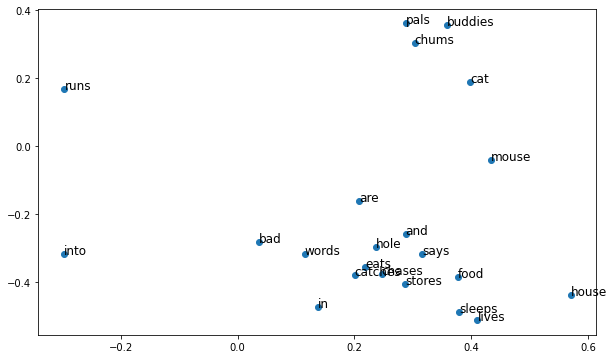

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter([i[1][0] for i in word2vec], [i[1][1] for i in word2vec])
for item in word2vec:
  word = item[0]
  plt.text(item[1][0], item[1][1], word, fontdict={'fontsize':12})
plt.show()

### Hyperparameters
 - Window size
 - Embedding Dimension
 - Type (CBOW or Skipgram)

### CBOW
- Faster to train, Good for Large text corpus.
- Better representation for Frequent words

![alt text](https://cdn-images-1.medium.com/max/800/1*UVe8b6CWYykcxbBOR6uCfg.png "CBOW")

### SKIPGRAM
- works well with a small amount of the training data
- Better representation for rare words

![alt text](https://miro.medium.com/max/568/1*3xy5IOpScN0aQwwfFbCmGQ.png "skipgram")

### FASTTEXT
#### Sub-word Level Embeddings
![alt text](https://i.imgur.com/HMbzqzy.png "fasttext")

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 2, input_length=window_size, name='emb'))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(vocab_size, activation='softmax', name='pred'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=10, batch_size=12)
model.get_layer('emb')(tf.convert_to_tensor([10]))

word2vec = []
for idx, word in idx2word.items():
    vec = model.get_layer('emb')(tf.convert_to_tensor([idx])).numpy().tolist()[0]
    word2vec.append((word, vec))

plt.figure(figsize=(10,6))
plt.scatter([i[1][0] for i in word2vec], [i[1][1] for i in word2vec])
for word, _ in word2vec:
    plt.text(_[0], _[1], word, fontdict={'fontsize':15})
plt.show()